> Importation des libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import PowerTransformer

> Importation des données

In [2]:
data1 = pd.read_csv('Edstats_csv/EdStatsCountry.csv')
data2 = pd.read_csv('Edstats_csv/EdStatsCountry-Series.csv') 
data3 = pd.read_csv('Edstats_csv/EdStatsData.csv') 
data4 = pd.read_csv('Edstats_csv/EdStatsFootNote.csv') 
data5 = pd.read_csv('Edstats_csv/EdStatsSeries.csv') 

> Définition des fonctions

In [3]:
# Nombre de lignes et de colonnes
def rows_columns(data) :
    nRow, nCol = data.shape
    print(f'There are {nRow} rows and {nCol} columns')

In [4]:
# Graphes de distribution des différents dataframes
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
# Graphes de densité des dataframes
def plot_graph(df_work):

    plt.figure(figsize=(10,5))
    axes = plt.axes()

    label_patches = []
    colors=['Crimson','SeaGreen','Sienna','DodgerBlue','Purple']

    i=0
    for col in df_work.columns:
        label=col
        sns.kdeplot(df_work[col])
        label_patch = mpatches.Patch(
            color=colors[i],
            label=label)
        label_patches.append(label_patch)
        i+=1
    plt.xlabel('')
    plt.legend(handles=label_patches, bbox_to_anchor=(1.05, 1)
               , loc=2, borderaxespad=0., facecolor='white')
    plt.grid(False)
    axes.set_facecolor('white')

    plt.show()

In [6]:
def missing_values(df):
    nb_nan_tot=df.isna().sum().sum()
    nb_donnees_tot=np.product(df.shape)
    pourc_nan_tot=round((nb_nan_tot/nb_donnees_tot)*100,2)
    print(f'Le nombre des valeurs manquantes représente {pourc_nan_tot} % de la totalité des données: ({nb_nan_tot} NaN pour {nb_donnees_tot} observations)')

# Data Exploration of Dataset 1

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [8]:
data1.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [9]:
# Résumé des variables qualitatives
data1.describe(exclude=[np.number])

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,...,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,...,3,2,2,2,27,60,75,2,35,20
top,NAM,Argentina,"Venezuela, RB",Republic of Korea,IM,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,IM,...,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2012",Yes,2010,2005
freq,1,1,1,1,1,23,6,57,55,1,...,107,106,95,110,59,10,15,110,36,40


In [10]:
# Résumé des variables quantitatives
data1.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [11]:
data1 = data1.drop('Unnamed: 31', axis=1)

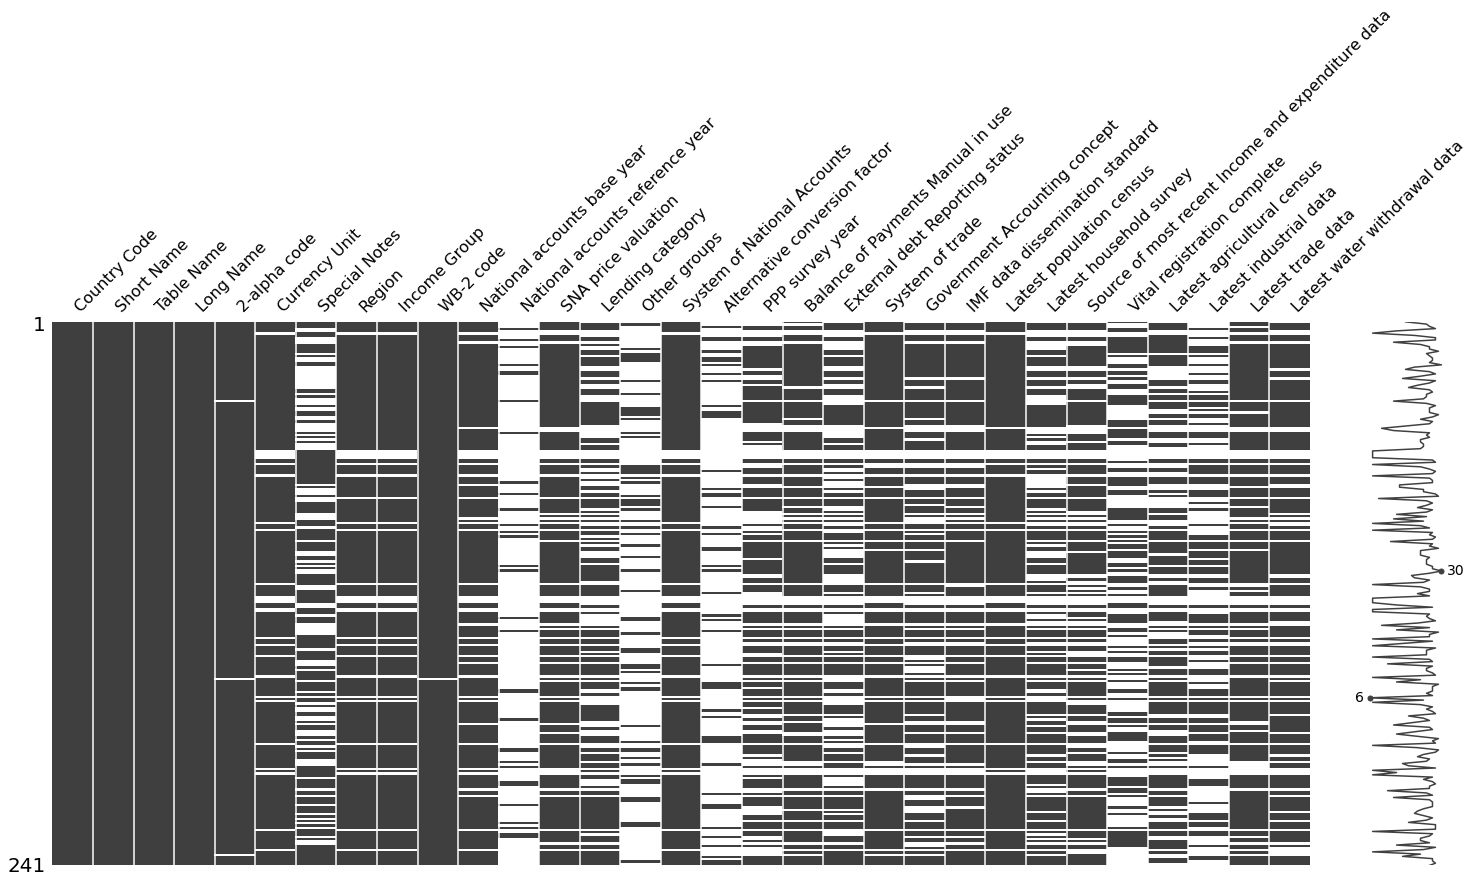

In [12]:
msno.matrix(data1)

In [13]:
missing_values(data1)

Le nombre des valeurs manquantes représente 28.28 % de la totalité des données: (2113 NaN pour 7471 observations)


In [14]:
# Vérifier la présence des doublons
doublons = data1[data1.duplicated(['Country Code'], keep=False)]
nb_doublons_code_pays = doublons.shape[0]
print(f'Nombre de doublons sur le code pays : {nb_doublons_code_pays}')

Nombre de doublons sur le code pays : 0


In [15]:
# Remplacer la région 'NaN' par 'Autres'
data1['Region'] = data1['Region'].replace(np.nan, 'Autres')
print('Régions :\n', data1['Region'].unique())
# Remplacer le groupe de revenus 'NaN' par 'Autres'
data1['Income Group'] = data1['Income Group'].replace(np.nan, 'Autres')
print('\nGroupes de revenus :\n', data1['Income Group'].unique())

Régions :
 ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Autres' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']

Groupes de revenus :
 ['High income: nonOECD' 'Low income' 'Upper middle income' 'Autres'
 'Lower middle income' 'High income: OECD']


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


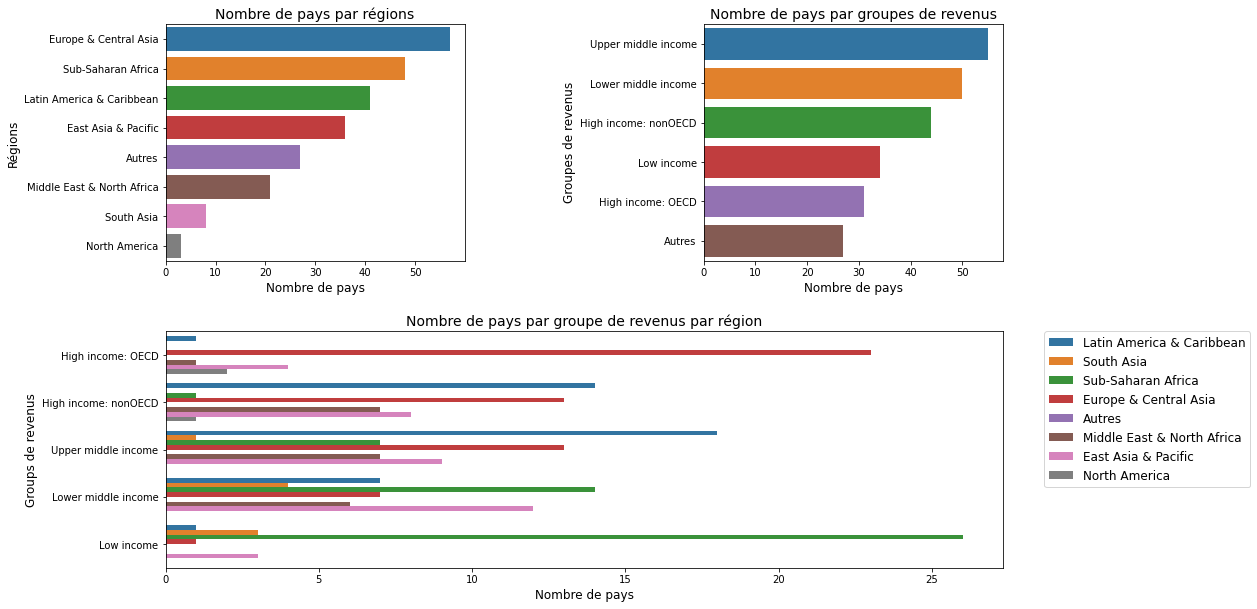

In [16]:
# Graphes des nombre de pays par régions et groupes de revenus

fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)

# Graphique ligne 1, colonne 1
plt.subplot(grid[0, 0])
# Regroupement des pays par régions
nb_pays_par_region = data1.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
#colors = ['Coral', 'Peru', 'HotPink', 'PowderBlue', 'Khaki', 'LightGreen', 'RoyalBlue', 'Cyan']
sns.barplot(nb_pays_par_region['Short Name'].sort_values(), nb_pays_par_region['Region'])
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Régions', fontsize=12)
plt.title('Nombre de pays par régions', fontsize=14)

# Graphique ligne 1, colonne 2
plt.subplot(grid[0, 1])
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu = data1.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'])
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupes de revenus', fontsize=12)
plt.title('Nombre de pays par groupes de revenus', fontsize=14)

# Graphique ligne 2, sur les 2 colonnes 
plt.subplot(grid[1, :])
# Regroupement des pays par groupe de revenus
sns.countplot(y='Income Group', hue='Region', data=data1, orient='h',
              order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'])
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groups de revenus', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title('Nombre de pays par groupe de revenus par région', fontsize=14)
plt.grid(False)

plt.show()

In [17]:
data1['System of National Accounts'] = data1['System of National Accounts'].str[17:21]

In [18]:
data1['System of National Accounts']

0      1993
1      1993
2      1993
3      1993
4      1968
       ... 
236    1993
237    1993
238    1993
239    1968
240    1993
Name: System of National Accounts, Length: 241, dtype: object

In [19]:
data1["Currency Unit"].isnull().sum()

26

In [20]:
np.sort((data1.isnull().sum())/len(data1)) #sort

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00414938, 0.01244813, 0.10788382, 0.10788382,
       0.11618257, 0.14937759, 0.17012448, 0.18257261, 0.23236515,
       0.24896266, 0.24896266, 0.25726141, 0.33195021, 0.33609959,
       0.39834025, 0.39834025, 0.40248963, 0.41078838, 0.41493776,
       0.48547718, 0.53941909, 0.5560166 , 0.7593361 , 0.80497925,
       0.86721992])

In [21]:
data1 = data1.drop(data1.loc[data1['Country Code']=='HIC'].index) #non representative data

In [22]:
print(data1["WB-2 code"].nunique())

239


In [23]:
data1['System of trade'] = data1['System of trade'].str[:7]

In [24]:
data1['Government Accounting concept'] = data1['Government Accounting concept'].str.split(' ').str[0]

In [25]:
data1['IMF data dissemination standard'] = data1['IMF data dissemination standard'].str.split(' ').str[0]

In [26]:
data1['Vital registration complete'] = data1['Vital registration complete'].replace(np.nan, 'No')

In [27]:
data1.isna().any()

Country Code                                         False
Short Name                                           False
Table Name                                           False
Long Name                                            False
2-alpha code                                          True
Currency Unit                                         True
Special Notes                                         True
Region                                               False
Income Group                                         False
WB-2 code                                             True
National accounts base year                           True
National accounts reference year                      True
SNA price valuation                                   True
Lending category                                      True
Other groups                                          True
System of National Accounts                           True
Alternative conversion factor                         Tr

In [28]:
rows_columns(data1)

There are 240 rows and 31 columns


<ipython-input-4-96b776bda402>:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)


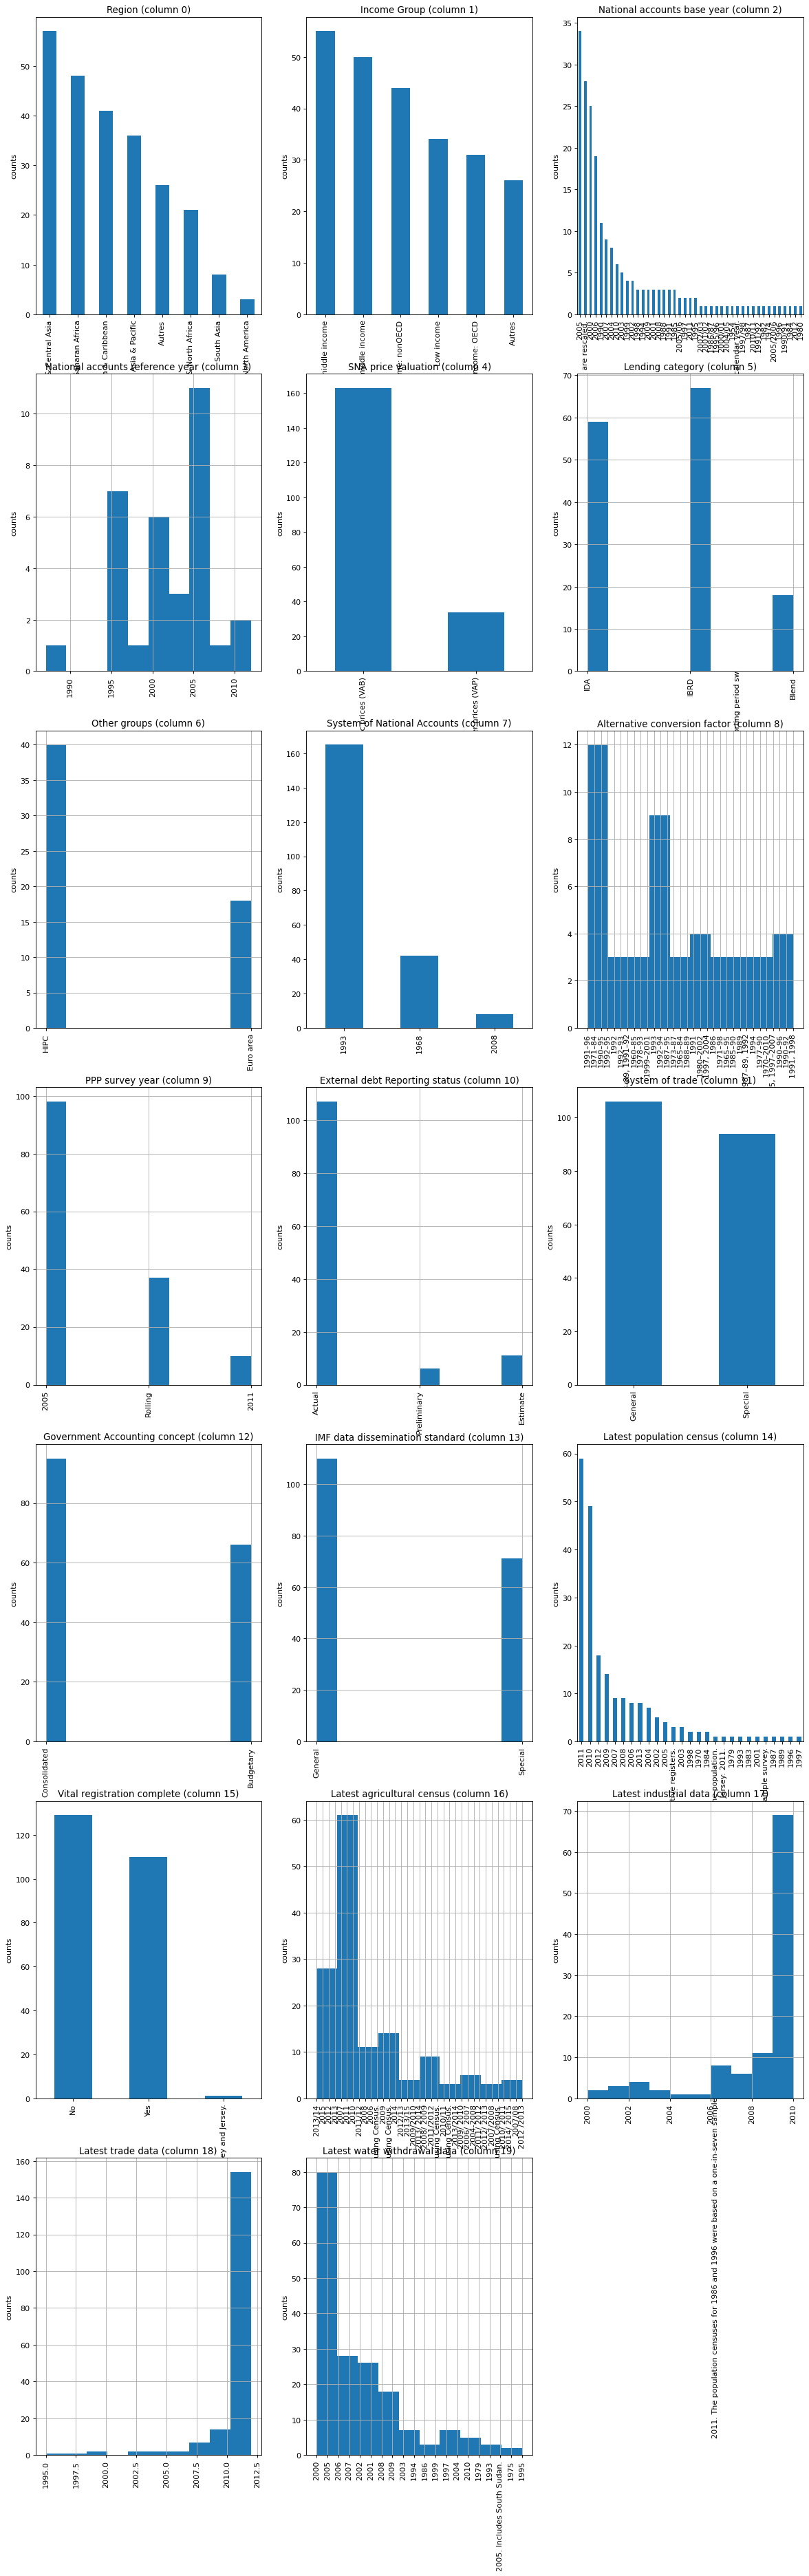

In [29]:
plotPerColumnDistribution(data1, 21, 3)


## Résumé sur EdStatsCountry.csv - Data1: 

- La base de données contient des informations géographiques sur les pays (les noms des pays, les regroupements par régions, par groupe de revenus…), des données économiques globales et des dates de référence des dernières études.
> **Après Modifications**
- La base de données contient 241 lignes et 31 colonnes.
- La colonne "Unnamed: 31" est creuse et donc supprimée.
- Le nombre des valeurs manquantes représente 27.56 % de la totalité des données: (2059 NaN pour 7471 observations)
- La base de données de présente pas de doublons.

# Exploration of Dataset 2

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [31]:
data2.head() 

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [32]:
rows_columns(data2)

There are 613 rows and 4 columns


In [33]:
# Résumé des variables qualitatives
data2.describe(exclude=[np.number])

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,GEO,SP.POP.GROW,Data sources : United Nations World Population...
freq,18,211,154


In [34]:
# Résumé des variables quantitatives
data2.describe()

,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [35]:
data2 = data2.drop('Unnamed: 3', axis=1)

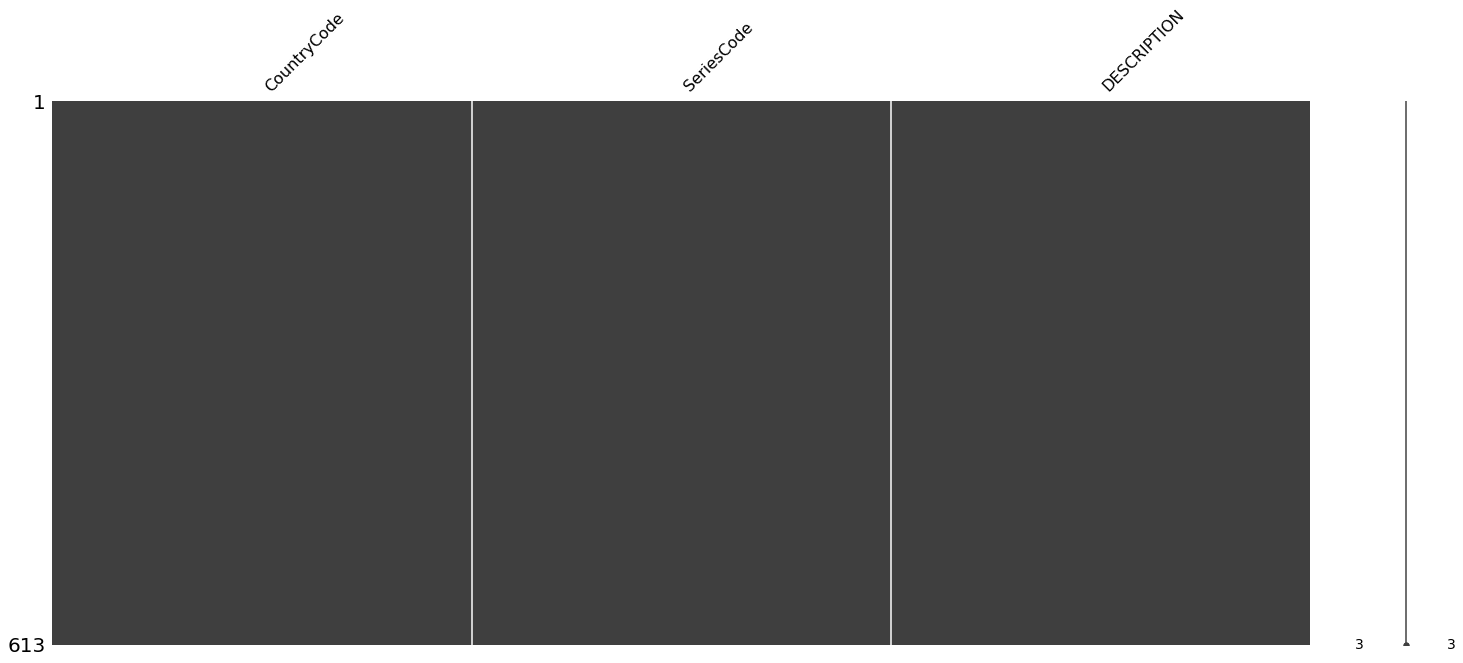

In [36]:
msno.matrix(data2)

In [37]:
#Pourcentage des valeurs nulles
missing_values(data2)

Le nombre des valeurs manquantes représente 0.0 % de la totalité des données: (0 NaN pour 1839 observations)


In [38]:
# Vérification des doublons
data2[data2.duplicated(keep=False)].shape[0]

0

In [39]:
# Vérification de la correspondance pays-data1 / pays-data2
data1['Country Code'].nunique() == data2['CountryCode'].nunique()

False

In [40]:
data1[~data1['Country Code'].isin(data2['CountryCode'])][['Short Name']].sort_values(by='Short Name')

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
122,Latin America & Caribbean (all income levels)


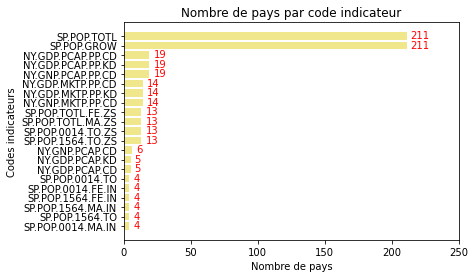

In [41]:
# Regroupement des pays par code indicateur
serie_code = data2.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode']
nb_pays_par_serie_code = data2.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values()


plt.barh(y=serie_code, width=nb_pays_par_serie_code, color='Khaki')
for i, v in enumerate(nb_pays_par_serie_code):
    plt.text(v + 3, i - .23, str(v), color='Red')
plt.title('Nombre de pays par code indicateur', fontsize=12)
plt.xlabel('Nombre de pays', fontsize=10)
plt.ylabel('Codes indicateurs', fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim([0, 250])
plt.grid(False)

## Résumé sur EdStatsCountry-Series.csv - Data2:

- La base de données contient les références des sources de certains indicateurs par pays présents dans la base de données data1.
- La colonne "Unnamed: 3" est totalement vide et donc supprimée.
> **Après Modifications**
- Le base de données contient 613 lignes et 3 colonnes.
- Le nombre des valeurs manquantes représente 0.0 % de la totalité des données: (0 NaN pour 1839 observations)

# Exploration of Dataset 3

In [42]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [43]:
data3.head() #TO EXPLORE

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Résumé des variables qualitatives
data3.describe(exclude=[np.number])

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Monaco,BRN,Wittgenstein Projection: Population age 15-19 ...,UIS.EA.1T6.AG25T99.GPI
freq,3665,3665,242,242


In [45]:
# Résumé des variables quantitatives
data3.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [46]:
# Nom des colonnes
data3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

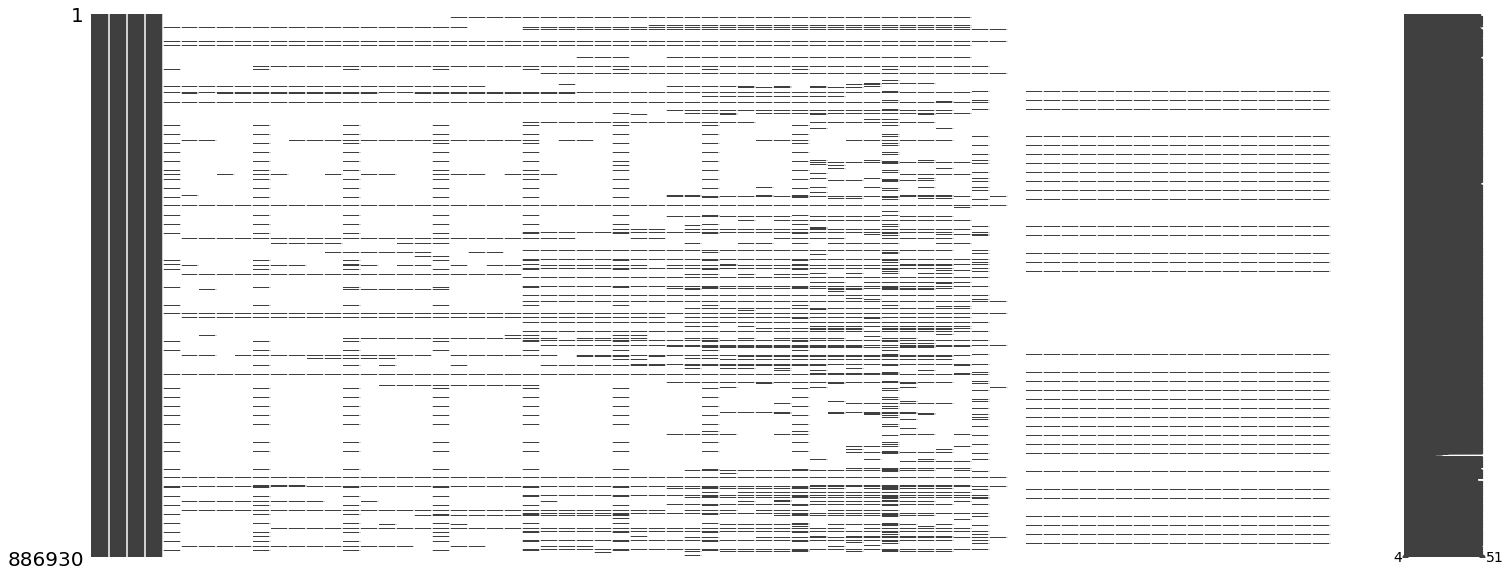

In [47]:
msno.matrix(data3)

In [48]:
data3 = data3.drop('Unnamed: 69',axis=1)

In [49]:
missing_values(data3)

Le nombre des valeurs manquantes représente 85.9 % de la totalité des données: (52568249 NaN pour 61198170 observations)


In [50]:
rows_columns(data3)

There are 886930 rows and 69 columns


In [51]:
# Vérification des doublons avec toutes les colonnes du dataframe
data3[data3.duplicated(keep=False)].shape[0]

0

In [52]:
# Vérification des doublons sur les 2 colonnes Country Code et Indicator Code
data3[data3.duplicated(['Country Code', 'Indicator Code'], keep=False)].shape[0]

0

In [53]:
# Vérifaction de correpondance des pays des data1 et data3
data3['Country Code'].nunique() == data1['Country Code'].nunique()

False

In [54]:
data1.drop(data1.loc[data1['Country Code']=='HIC'].index, inplace = True)

In [55]:
data1.loc[data1['Country Code']=='HIC']

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data


In [56]:
data3.loc[data3['Country Code']=='HIC']

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
29320,High income,HIC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29321,High income,HIC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29322,High income,HIC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29323,High income,HIC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29324,High income,HIC,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,90.785957,90.821022,90.782692,91.206543,90.905762,91.217361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32980,High income,HIC,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32981,High income,HIC,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32982,High income,HIC,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32983,High income,HIC,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data3.drop(data3.loc[data3['Country Code']=='HIC'].index, inplace = True)

In [58]:
# Recherche du pays présents dans data3 mais pas dans data1
df_pays_plus = data3[~data3['Country Code'].isin(data1['Country Code'])][['Country Name']]
df_pays_plus.drop_duplicates(inplace=True)
df_pays_plus

,Country Name
190580,British Virgin Islands


In [59]:
#Comparaison des pays présents dans EdStatsData.csv et EdStatsCountries-Series.csv
# Le nombre de code ISO alpha 3 ne correspond pas au code ISO alpha 3 du jeu de données EdStatsCountry-Series.csv.
data3['Country Code'].nunique() == data2['CountryCode'].nunique()

False

In [60]:
# Recherche du pays présent dansEdStatsData.csv mais n'apparaissant pas dans le jeu de données EdStatsCountry-Series.csv
df_pays_plus2 = data3[~data3['Country Code'].isin(data2['CountryCode'])][[
    'Country Name']].sort_values(by='Country Name')
df_pays_plus2.drop_duplicates(inplace=True)
df_pays_plus2
# ==> Les pays en plus dans le jeu de données EdStatsData.csv sont : des noms de région, ou des noms de regroupement de revenus
# ou certains regroupement de pays (European Union, North America..) et certains pays devenus autonomes (Curaçao).

,Country Name
0,Arab World
193025,British Virgin Islands
278539,Curacao
4883,East Asia & Pacific
7330,East Asia & Pacific (excluding high income)
10996,Euro area
15888,Europe & Central Asia
20157,Europe & Central Asia (excluding high income)
25653,European Union
29319,Heavily indebted poor countries (HIPC)


#### Nombre de données par année / par décénnie

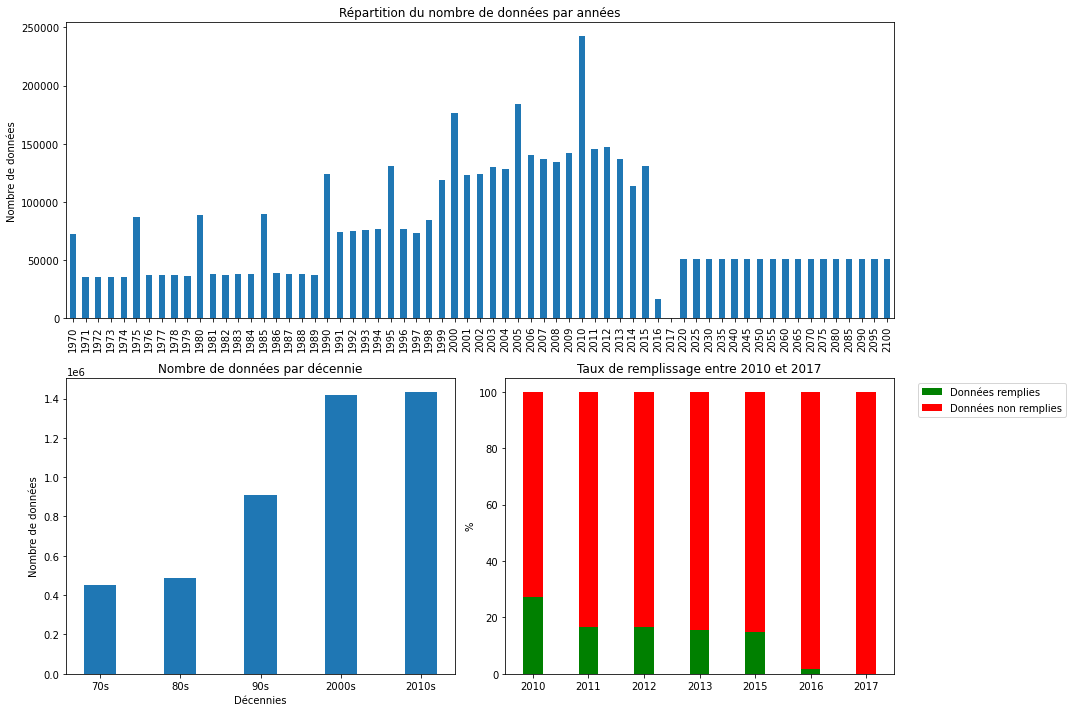

In [61]:
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(G[0, :])
# Répartition du nombre de données renseignées par années pour tous les indicateurs et tous les pays
present = data3.loc[:, '1970':'2100'].notnull().sum()
ax1 = present.plot(kind='bar')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)

ax2 = plt.subplot(G[1, 0])
# Regroupement du nombre de données par décennie
decade = data3.loc[:, '1970':'2020'].copy().count()
ans = ['70s', '80s', '90s', '2000s', '2010s']
for i in range(5):
    j = i*10
    k = j+10
    decade[ans[i]] = decade[j:k, ].sum()
# Affihage de la répartitions des données exploitables par décennie
width = 0.4
ax2.bar(decade[ans].index, decade[ans].values, width)
ax2.set_xlabel('Décennies')
ax2.set_ylabel('Nombre de données')
ax2.set_title('Nombre de données par décennie')
ax2.grid(False)

ax3 = plt.subplot(G[1, 1])
# Nombre de données totales
nb_tot = data3.shape[0]
# Nombre de données non nulles par année de la décénnie 2010
annees = ['2010', '2011', '2012', '2013', '2015', '2016', '2017']
nb_nonnul = data3.copy()[annees].count()
df_2010s = pd.DataFrame({'annee': nb_nonnul.index, 'nb_nonnul': nb_nonnul.values})
# Taux de remplissage par année de la décénnie 2010
df_2010s['%_nonnul'] = round((df_2010s['nb_nonnul'])*100/nb_tot, 2)
# Nombre de NaN par année de la décénnie 2010
df_2010s['%_nan'] = round(100-df_2010s['%_nonnul'], 2)
width = 0.35
annes = df_2010s.index
taux_remplissage = df_2010s['%_nonnul']
taux_nan = df_2010s['%_nan']
ax3.bar(annees, taux_remplissage, width, label='Données remplies', color = 'Green')
ax3.bar(annees, taux_nan, width, bottom=taux_remplissage,
        label='Données non remplies', color='Red')
ax3.set_ylabel('%')
ax3.set_title('Taux de remplissage entre 2010 et 2017')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2)
ax3.grid(False)

plt.tight_layout()
plt.show()

On observe un pic de données tous les 5 ans.
Les données sont doublées tous les 10 ans à partir de 1990.
La dernière année exploitable est 2015.
Les années 2020 à 2100 sont des années de prédiction.
Les années 2010 sont les années avec le plus de données significatives et parmi cette décennie l'année 2010 est la plus fournie avec seulement 27% de données.
Les années 2016 et 2017, les plus proches de l'année courante (2021) contiennent moins de 2 % de variables et sont donc inexploitables.

## Résumé sur EdStatsData.csv - Data3:

- La base de données Data3 est la plus volumineuse de toutes les bases de données fournies.
- Data3 contient 886930 lignes et 69 colonnes.
- Le nombre des valeurs manquantes représente 85.9 % de la totalité des données: (52568249 NaN pour 61198170 observations).
- La colonne 'Unnamed: 69' est vide et donc entièrement supprimée.
- Data3 est remplie par des données traduisant multiples indicateurs des pays.
- Data3 comporte 2 parties des données, une consacrée pour l'étude et l'exploitation (1970 à 2017) et l'autre à la prédiction à long terme (de 2020 à 2100).
- La base de données ne présente pas de doublons.
- L'année 2010 représente un pic de données, cependant ~75% de ses données sont non remplies.
- L'année 2017 représente une année creuse (~100% des données sont non remplies) et donc à écarter.
- L'année 2012 présente le plus de données et la deuxième mieux remplie (après 2017) et donc sera sujet d'exploitation.

In [62]:
#how many data for every year => keep years with more than 50% of data (après 2000)
#infrastructure, internet

# Exploration of Dataset 4

In [63]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [64]:
data4.head() #probably to ignore

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [65]:
# Résumé des variables qualitatives
data4.describe(exclude=[np.number])

,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188


In [66]:
# Résumé des variables quantitatives
data4.describe()

,Unnamed: 4
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


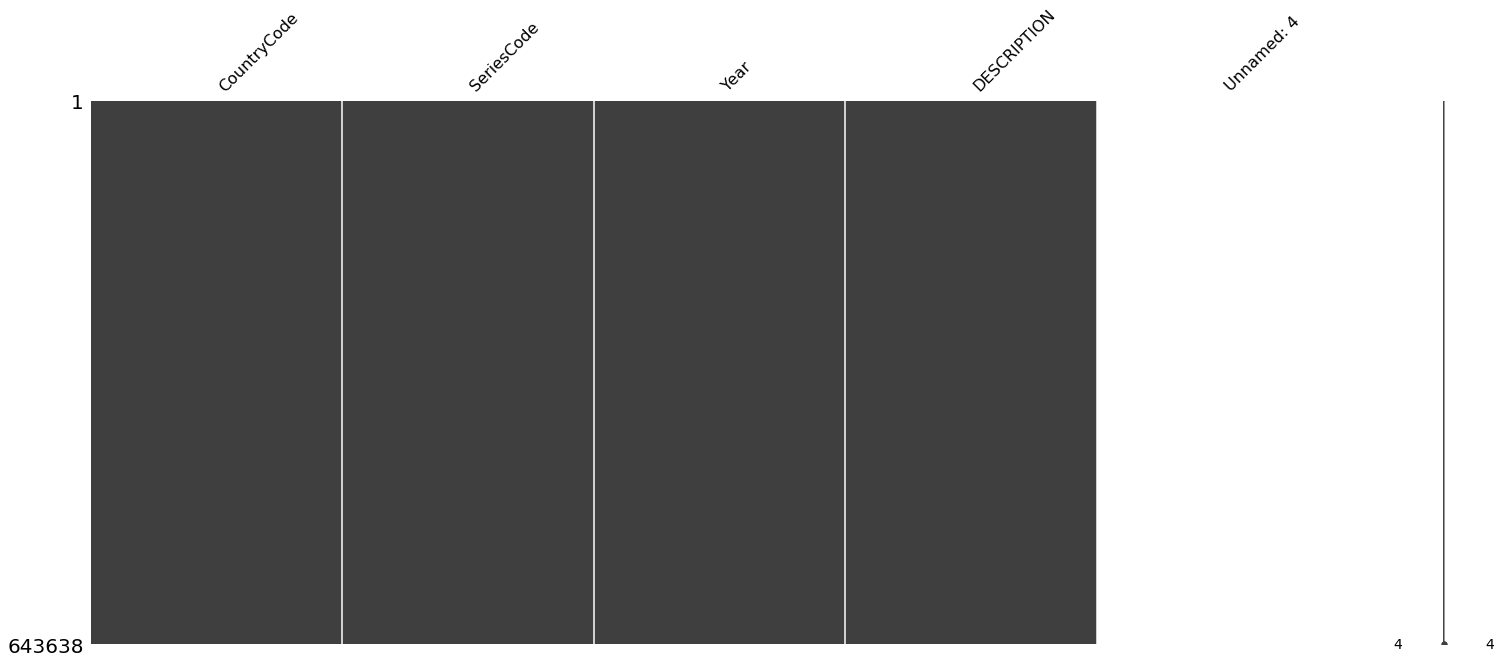

In [67]:
msno.matrix(data4)

In [68]:
data4 = data4.drop("Unnamed: 4", axis=1)

In [69]:
rows_columns(data4)

There are 643638 rows and 4 columns


In [70]:
missing_values(data4)

Le nombre des valeurs manquantes représente 0.0 % de la totalité des données: (0 NaN pour 2574552 observations)


In [71]:
# Vérification des doublons
data4[data4.duplicated(keep=False)].shape[0]

0

In [72]:
# Doublons sur les 2 colonnes CountryCode et SeriesCode
doublons_deux = data4[data4.duplicated(
    ['CountryCode', 'SeriesCode'], keep=False)]
print(f'Nombre de doublons code pays/indicateur: {doublons_deux.shape[0]}.')
doublons_deux

Nombre de doublons code pays/indicateur: 622238.


,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
...,...,...,...,...
643632,ZWE,SH.DYN.MORT,YR2004,Uncertainty bound is 90.7 - 107.8
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3


In [73]:
# Doublons sur la colonne CountryCode
doublons_1 = data4[data4.duplicated(['DESCRIPTION'], keep=False)]
print(doublons_1.shape)
data4['DESCRIPTION'].nunique()

(635775, 4)


9102

In [74]:
# Vérification de la correspondance des pays dans data1 et data4
data1['Country Code'].nunique() == data4['CountryCode'].nunique()

False

In [75]:
# Recherche des noms des pays n'apparaissant pas dans data4
data1[~data1['Country Code'].isin(data4['CountryCode'])][[
    'Short Name']].sort_values(by='Short Name')

,Short Name
85,Greenland
207,Sint Maarten (Dutch part)
134,St. Martin (French part)


## Résumé sur EdStatsFootNote.csv - Data4 :

- La base de données Data4 présente 643638 lignes et 5 colonnes
- La colonne "Unnamed: 4" est creuse et donc supprimée.
- Le nombre des valeurs manquantes représente 0.0 % de la totalité des données: (0 NaN pour 3218190 observations)

# Exploration of Dataset 5

In [76]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [77]:
data5.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
rows_columns(data5)

There are 3665 rows and 21 columns


In [79]:
data5.nunique()

Series Code                            3665
Topic                                    37
Indicator Name                         3665
Short definition                       1169
Long definition                        2060
Unit of measure                           0
Periodicity                               1
Base Period                               4
Other notes                              14
Aggregation method                        3
Limitations and exceptions                9
Notes from original source                0
General comments                          8
Source                                   31
Statistical concept and methodology       2
Development relevance                     1
Related source links                      1
Other web links                           0
Related indicators                        0
License Type                              0
Unnamed: 20                               0
dtype: int64

In [80]:
# Résumé des variables qualitatives
data5.describe(exclude=[np.number])

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,UIS.EA.1T6.AG25T99.GPI,Learning Outcomes,"UIS: Net attendance rate, primary, middle quin...",Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,Data up to 2016 are estimates while data from ...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215


In [81]:
# Résumé des variables quantitatives
data5.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


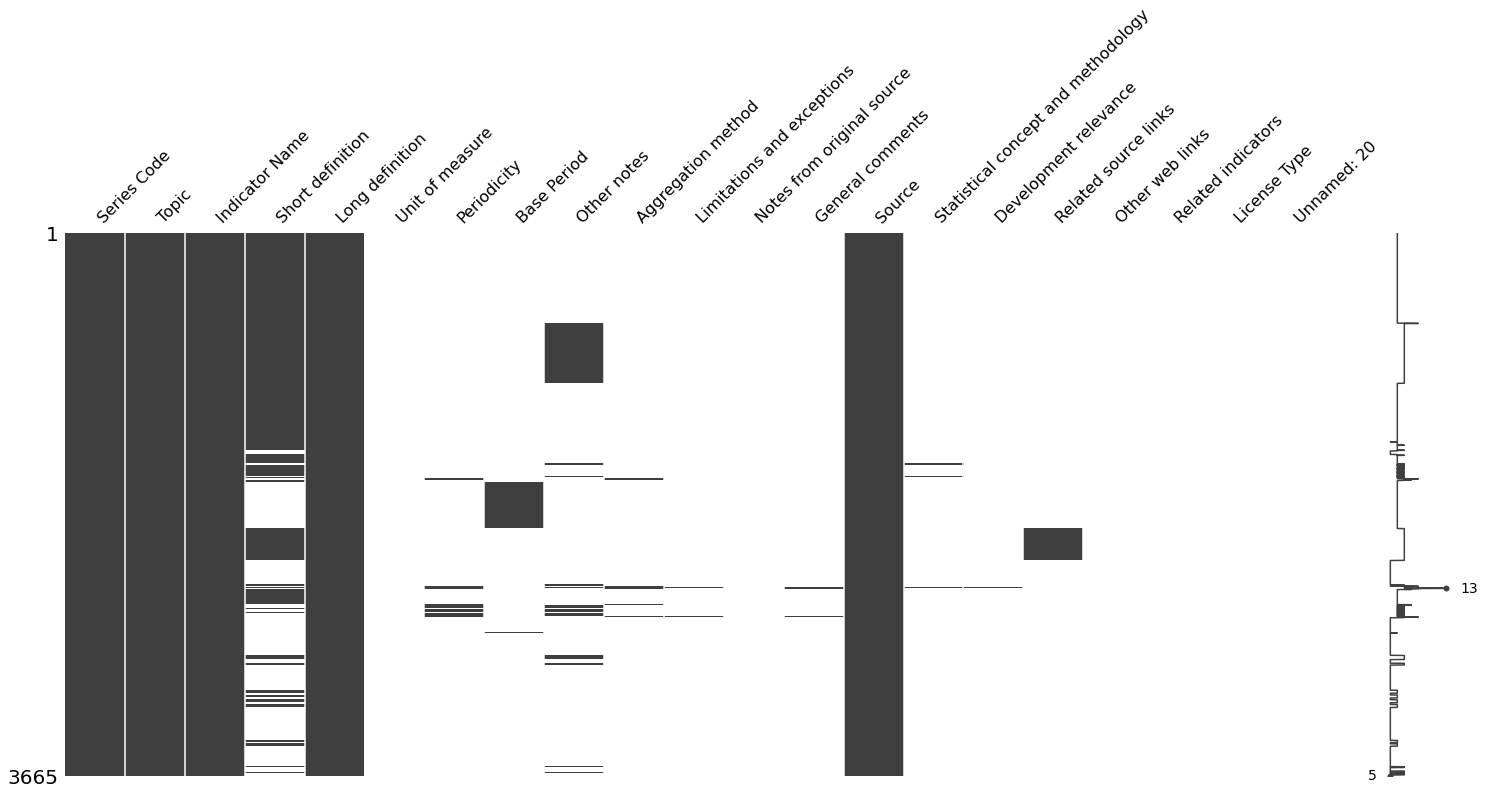

In [82]:
msno.matrix(data5)

In [83]:
data5 = data5.drop('Unnamed: 20', axis=1)

In [84]:
rows_columns(data5)

There are 3665 rows and 20 columns


In [85]:
missing_values(data5)

Le nombre des valeurs manquantes représente 70.31 % de la totalité des données: (51538 NaN pour 73300 observations)


In [86]:
# Doublon avec toutes les colonnes du dataframe
data5[data5.duplicated(keep=False)].shape[0]

0

In [87]:
#remplir les données manquantes (30%)
#regarder le taux de remplissage (>50% nulles => on écarte)
#garder les indicateurs les plus importants pour convaincre les investisseurs

In [88]:
# Nombre de thèmes
unique = data5['Topic'].nunique()
print(f'{unique} thèmes regroupant les indicateurs')

37 thèmes regroupant les indicateurs


#### Codes indicateurs\ Top 10 Topics \ Last 10 Topics

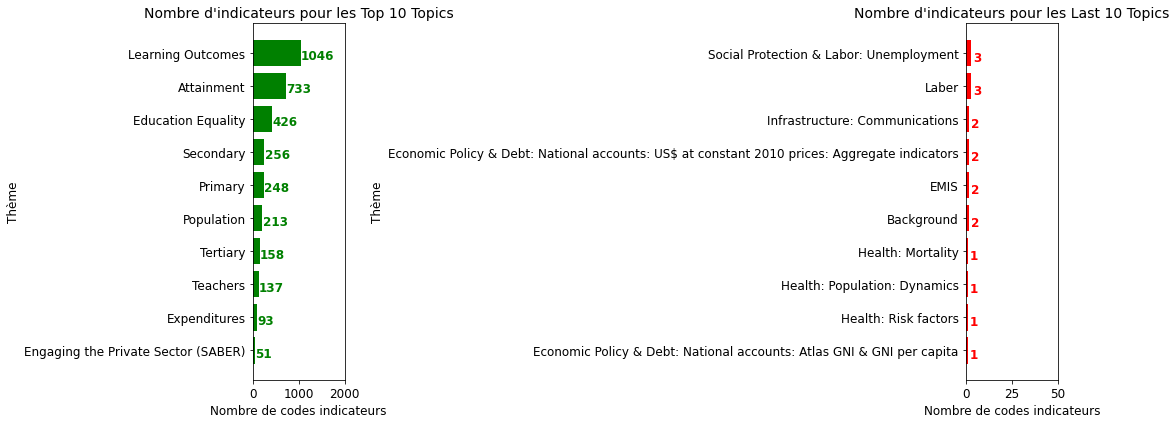

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Graphique ligne 1, colonne 1 ------------------
# Top 10 Topics
theme = data5.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].tail(10)
nb_code_par_theme = data5.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().tail(10)
ax1 = ax[0]
ax1.barh(y=theme, width=nb_code_par_theme, color='Green')
for i, v in enumerate(nb_code_par_theme):
    ax1.text(v + 3, i - .2, str(v), color='Green',fontweight='bold', fontsize=12)
ax1.set_title('Nombre d\'indicateurs pour les Top 10 Topics', fontsize=14)
ax1.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax1.set_ylabel('Thème', fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 2000])

# Last 10 Topics
theme_moins = data5.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].head(10)
nb_code_par_theme_moins = data5.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().head(10)
ax2 = ax[1]
ax2.barh(y=theme_moins, width=nb_code_par_theme_moins, color='Red')
for i, v in enumerate(nb_code_par_theme_moins):
    ax2.text(v + 1, i - .25, str(v), color='Red', fontweight='bold', fontsize=12)
ax2.set_title('Nombre d\'indicateurs pour les Last 10 Topics', fontsize=14)
ax2.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax2.set_ylabel('Thème', fontsize=12)
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 50])

fig.tight_layout()
plt.show()

In [90]:
# Extraction des nom courts et longs des indicateurs pour analyser EdStatsData.csv
data5_1 = data5[['Series Code', 'Indicator Name', 'Short definition', 'Long definition']]
# df_tmp.to_csv('Indicateurs.txt', header=True, index=None, sep=',', mode='w')

In [91]:
#####data5 = data5[["Series Code","Topic","Short definition"]]

## Résumé sur EdStatsSeries.csv - Data5 :

- La base de données Data5 contient 3665 lignes et 20 colonnes
- Le nombre des valeurs manquantes représente 70.31 % de la totalité des données: (51538 NaN pour 73300 observations).
- Data5 présente les descriptions des indicateurs et leurs sources et regroupe la liste des indicateurs en 37 Topics.
- La base de données ne présente pas de doublons.

In [92]:
#plus de 70% de valeurs nulles, on écarte
#une ligne avec 50% de valeurs nulles, on écarte
#score pour chaque pays (10 colonnes indicateurs si le pays est bon ou pas) => distribution des ages, genre, 
#more details from data5
#internet, infra, education, income => statistiques => pays plus attractifs
#normaliser les colonnes avec valeurs uniques + scoring
#graphs circulaires, histogrammes, 
#try merge (vérifier les Series Code avec les valeurs uniques )
#systèmes éducatifs en ligne (age, situation financière et infrast)

# Sélection des indicateurs pertinents

**Réduction temporelle**

D'après la description des données de EdStastsData.csv, la décénnie 2010 est la plus fournie en données sur la période 2010-2015 (plus de 94% de NaN pour 2016-2017).

Plage temporelle retenue : 2010-2015.

In [93]:
cols_annees = data3.columns[44:-20].tolist()

**Réduction par seuil du taux de remplissage des 3665 indicateurs possibles**

,count,mean,std,min,25%,50%,75%,max
TOT,3665.0,214.284584,282.986483,0.0,15.00,100.00,293.00,1185.00
%,3665.0,14.758357,19.489240,0.0,1.03,6.89,20.18,81.61


Qantile 80% : %    27.27
Qantile 90% : %    49.86


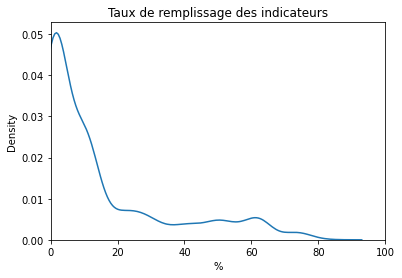

Indicateurs restants : 340


In [94]:
# -------------------------------------------------------------------------------------------------------------
# Répartition du nombre de données manquantes par années pour tous les indicateurs et tous les pays
# -------------------------------------------------------------------------------------------------------------
# Dataframe de travail
df_taux_indicateurs = data3.copy()

# Compte le nombre de chaque indicateur par année
df_taux_indicateurs = df_taux_indicateurs.groupby('Indicator Code')[cols_annees].count()
df_taux_indicateurs = df_taux_indicateurs.reset_index()
# La variable 'TOT' est le nombre de données par indicateur pour tous les pays pour toutes les années.
df_taux_indicateurs['TOT'] = df_taux_indicateurs[cols_annees].sum(axis=1)
# La variable '%' est le taux de remplissage de chaque indicateur pour tous les pays pour toutes les années.
# Chaque indicateur peut être associé à 242 pays pour chaque année (6 années) : 242*6=1452
df_taux_indicateurs['%'] = round((df_taux_indicateurs['TOT'])*100/1452, 2)
# Indicateurs statistiques
display(df_taux_indicateurs[['TOT', '%']].describe().T)
quantile_80 = df_taux_indicateurs[['%']].quantile(0.8).to_string()
print(f'Qantile 80% : {quantile_80}')
quantile_90 = df_taux_indicateurs[['%']].quantile(0.9).to_string()
print(f'Qantile 90% : {quantile_90}')
# Analyse du taux de remplissage des indicateurs pour toutes les années pour trouver le seuil
sns.kdeplot(df_taux_indicateurs['%'])
plt.grid(False)
plt.xlim([0, 100])
plt.title('Taux de remplissage des indicateurs')
plt.show()

df_indic_reduit = df_taux_indicateurs[df_taux_indicateurs['%'] > 50]
print(f'Indicateurs restants : {df_indic_reduit.shape[0]}')

**Recherche par mots clés correspondant à la cible**

La population cible de "Academy" est caractérisée par :
- un public de niveau lycée et université ==> population appartnenant à la tranche d'âge 15-24 ans
- des étudiants scolarisés au niveau lycée et universités
- de bons moyens de communication (Internet, Electricité, Ordinateurs)

Suite à une recherche sur le site de la banque mondiale explorant les bases de données en question, les indicateurs à garder sont: 
- SE : Social Education
- SP : Social Population
- IT : Infrastructure
- NY : National Accounts, produits intérieurs et nationaux
- EG : Energie
et les mots clés à rechercher dans notre base de données sont:
- 15 : pour la cible de la population des 15-19 ans
- 24 : pour la cible de la population des 20-24 ans
- SEC : pour les regroupements par lycéens
- TER : pour les regroupements par étudiants de l'enseignement supérieur
- IT : pour l'accès aux infrastructures techniques
- EG : pour l'accès aux informations sur l'énergie

In [95]:
# Dataframe avec nom d'indicateur
df_work_indic = data5[['Series Code','Indicator Name', 'Topic', 'Long definition']]
df_work_indic.drop_duplicates(inplace=True)
df_indic_reduit = pd.merge(df_indic_reduit, df_work_indic, how='left', left_on='Indicator Code', right_on='Series Code')
df_indic_reduit.drop(columns=['Series Code'], inplace=True)

<ipython-input-95-508bc93c9d54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_indic.drop_duplicates(inplace=True)


In [96]:
# Cible : lycéens et étudiantes appartenant à la tranche d'âge 15-24 ans
pd.set_option('max_colwidth', None)
liste_mot_cle_15 = [row for row in df_indic_reduit['Indicator Code'] if ('15') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_15)][['Indicator Code', 'Indicator Name', 'Topic', 'Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
141,SP.POP.1015.FE.UN,"Population, ages 10-15, female",Population,"Population, ages 10-15, female is the total number of females age 10-15."
142,SP.POP.1015.MA.UN,"Population, ages 10-15, male",Population,"Population, ages 10-15, male is the total number of males age 10-15."
143,SP.POP.1015.TO.UN,"Population, ages 10-15, total",Population,"Population, ages 10-15, total is the total population age 10-15."
153,SP.POP.1115.FE.UN,"Population, ages 11-15, female",Population,"Population, ages 11-15, female is the total number of females age 11-15."
154,SP.POP.1115.MA.UN,"Population, ages 11-15, male",Population,"Population, ages 11-15, male is the total number of males age 11-15."
155,SP.POP.1115.TO.UN,"Population, ages 11-15, total",Population,"Population, ages 11-15, total is the total population age 11-15."
165,SP.POP.1215.FE.UN,"Population, ages 12-15, female",Population,"Population, ages 12-15, female is the total number of females age 12-15."
166,SP.POP.1215.MA.UN,"Population, ages 12-15, male",Population,"Population, ages 12-15, male is the total number of males age 12-15."
167,SP.POP.1215.TO.UN,"Population, ages 12-15, total",Population,"Population, ages 12-15, total is the total population age 12-15."
195,SP.POP.1524.FE.UN,"Population, ages 15-24, female",Population,"Population, ages 15-24, female is the total number of females age 15-24."


In [97]:
# Cible : éducation secondaire
liste_mot_cle_sec = [
    row for row in df_indic_reduit['Indicator Code'] if ('SEC') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_sec)][[
    'Indicator Code', 'Indicator Name', 'Topic', 'Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
16,SE.ENR.SECO.FM.ZS,"Gross enrolment ratio, secondary, gender parity index (GPI)",Secondary,"Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
50,SE.SEC.AGES,Official entrance age to lower secondary education (years),Secondary,"Age at which students would enter lower secondary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade."
51,SE.SEC.CMPT.LO.FE.ZS,"Lower secondary completion rate, female (%)",Secondary,"Total number of new female entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total female population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
52,SE.SEC.CMPT.LO.MA.ZS,"Lower secondary completion rate, male (%)",Secondary,"Total number of new male entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total male population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
53,SE.SEC.CMPT.LO.ZS,"Lower secondary completion rate, both sexes (%)",Secondary,"Total number of new entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
54,SE.SEC.DURS,Theoretical duration of secondary education (years),Secondary,Number of grades (years) in secondary education (ISCED 2 and 3).
55,SE.SEC.DURS.LO,NaN,NaN,NaN
56,SE.SEC.DURS.UP,Theoretical duration of upper secondary education (years),Secondary,Number of grades (years) in upper secondary education.
57,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",Secondary,Total number of students enrolled at public and private secondary education institutions regardless of age.
58,SE.SEC.ENRL.FE,"Enrolment in secondary education, female (number)",Secondary,Total number of female students enrolled at public and private secondary education institutions regardless of age.


In [98]:
# Cible : moyen de communication internet
liste_mot_cle_it = [
    row for row in df_indic_reduit['Indicator Code'] if ('IT') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_it)][[
    'Indicator Code', 'Indicator Name', 'Topic', 'Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
0,IT.NET.USER.P2,Internet users (per 100 people),Infrastructure: Communications,"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc."


In [99]:
# Cible : énergie, accès à l'éléctricité
liste_mot_cle_ene = [
    row for row in df_indic_reduit['Indicator Code'] if ('EG') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_ene)][[
    'Indicator Code', 'Indicator Name', 'Topic', 'Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition


In [100]:
# Cible : économie
liste_mot_cle_eco = [
    row for row in df_indic_reduit['Indicator Code'] if ('NY') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_mot_cle_eco)][[
    'Indicator Code', 'Indicator Name', 'Topic', 'Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
1,NY.GDP.MKTP.CD,GDP (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
2,NY.GDP.MKTP.KD,GDP (constant 2010 US$),Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
3,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current international dollars. For most economies PPP figures are extrapolated from the 2011 International Comparison Program (ICP) benchmark estimates or imputed using a statistical model based on the 2011 ICP. For 47 high- and upper middle-income economies conversion factors are provided by Eurostat and the Organisation for Economic Co-operation and Development (OECD).
4,NY.GDP.MKTP.PP.KD,"GDP, PPP (constant 2011 international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2011 international dollars.
5,NY.GDP.PCAP.CD,GDP per capita (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
6,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,GDP per capita is gross 

In [101]:
# Taux de remplissage sur 2010-2015
indicateurs_retenus = ['SP.POP.1524.TO.UN', 
                       'SE.TER.ENRL', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD']
mask = df_indic_reduit['Indicator Code'].isin(indicateurs_retenus)
cols = ['Indicator Code', 'Indicator Name', '%']
df_indic_reduit[mask][cols]

,Indicator Code,Indicator Name,%
0,IT.NET.USER.P2,Internet users (per 100 people),77.62
12,NY.GNP.PCAP.PP.CD,"GNI per capita, PPP (current international $)",72.18
79,SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",54.96
197,SP.POP.1524.TO.UN,"Population, ages 15-24, total",62.33


**Bilan : indicateurs retenus**

- démographique : SP.POP.1524.TO.UN
- économique : NY.GNP.PCAP.PP.CD
- éducation : SE.SEC.ENRL
- numérique : IT.NET.USER.P2

# Réduction de la base de données Data3

**Réduction temporelle**

D'après la description des données de EdStastsData.csv, la décénnie 2010 est la plus fournie en données sur la période 2010-2015 (plus de 94% de NaN pour 2016-2017) : Plage temporelle retenue : 2010-2015.

In [104]:
df_pays=data3.copy()
cols_a_supr = data3.columns[4:44].to_list()
cols_a_supr.extend(data3.columns[50:-1].to_list())
df_pays.drop(columns=cols_a_supr, inplace=True)

**Réduction par les indicateurs pertinents**

In [105]:
# Liste des indicateurs pertinents à garder
indicateurs_a_garder = ['SP.POP.1524.TO.UN', 'SE.SEC.ENRL', 'NY.GNP.PCAP.PP.CD','IT.NET.USER.P2']
# On ne conserve que les lignes donnant des informations sur les indicateurs retenus
df_pays = df_pays[df_pays['Indicator Code'].isin(indicateurs_a_garder)]
print(f'Nombre de lignes restantes : {df_pays.shape[0]}')

Nombre de lignes restantes : 964


# 5. Fusion des données nécessaires des différents datasets

In [106]:
# Variable 'Region' et 'Income Group' du jeu de données EdStatsCountry.csv en supprimant les données dupliquées
countries_income = pd.DataFrame({'Country_Code': data1['Country Code'].unique(),
                                 'Region': data1['Region'],
                                 'Income Group': data1['Income Group']})
df_pays = pd.merge(df_pays, countries_income,
                   left_on='Country Code', right_on='Country_Code', how='left')
df_pays.drop(columns=['Country_Code'], inplace=True)
df_pays.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010', '2011', '2012', '2013', '2014', '2015', '2100', 'Region',
       'Income Group'],
      dtype='object')

**Régions 'NaN'**

In [107]:
df_pays['Region'].unique()

array(['Autres', 'South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America',
       nan], dtype=object)

In [108]:
df_pays[df_pays['Region'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2100,Region,Income Group
204,British Virgin Islands,VGB,"Enrolment in secondary education, both sexes (number)",SE.SEC.ENRL,2029.0,1923.0,1955.0,1977.0,1987.0,2027.0,NaN,NaN,NaN
205,British Virgin Islands,VGB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,British Virgin Islands,VGB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,British Virgin Islands,VGB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Le pays British Virgin Islands appartient à la région 'Latin America & Caribbean'
#source: https://data.worldbank.org/country/VG
df_pays.loc[[204, 205, 206, 207], 'Region'] = [
    'Latin America & Caribbean', 'Latin America & Caribbean', 'Latin America & Caribbean', 'Latin America & Caribbean']

**Groupes de revenus 'NaN'**

In [110]:
df_pays['Income Group'].unique()

array(['Autres', 'Low income', 'Upper middle income',
       'High income: nonOECD', 'Lower middle income', 'High income: OECD',
       nan], dtype=object)

In [111]:
df_pays[df_pays['Income Group'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2100,Region,Income Group
204,British Virgin Islands,VGB,"Enrolment in secondary education, both sexes (number)",SE.SEC.ENRL,2029.0,1923.0,1955.0,1977.0,1987.0,2027.0,NaN,Latin America & Caribbean,NaN
205,British Virgin Islands,VGB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,NaN
206,British Virgin Islands,VGB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,NaN
207,British Virgin Islands,VGB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,NaN


In [112]:
# Le pays British Virgin Islands appartient au groupe de revenus 'High income: nonOECD'
#source: https://data.worldbank.org/country/VG
df_pays.loc[[204, 205, 206, 207], 'Income Group'] = [
    'High income: nonOECD', 'High income: nonOECD','High income: nonOECD','High income: nonOECD']

### 6. Analyse des indicateurs retenus

In [113]:
# Propagation des valeurs non nulles de 2010 vers 2015 pour travailler sur dernière valeur connue non nulle la plus récente en 2015
df_pays_fillna = df_pays.copy()
cols_to_interpolate = df_pays_fillna.columns[4:-2].tolist()
#  Variables quantitatives
df_numeric = df_pays_fillna[cols_to_interpolate]
# Variables qualitatives
df_categ = df_pays_fillna.loc[:, ['Country Name', 'Country Code',
                                  'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
df_numeric.fillna(method='ffill', axis=1, inplace=True)
df_pays_fillna = pd.concat([df_categ, df_numeric], axis=1)
nb_pays = df_pays_fillna['Country Name'].nunique()
print(f'Nombre de pays : {nb_pays}')
# On ne conserve que la dernière année totalement remplie : 2015
df_pays_1an = df_pays_fillna[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Region',
                              'Income Group', '2015']]
# # Dernière colonne remplie renommée en 'Last info'
df_pays_1an.rename(columns={'2015': 'Last info'}, inplace=True)
# # La méthode fillna transforme tous les types en object ==> retransformer la dernière colonne en numérique
df_pays_1an = df_pays_1an.astype({'Last info': 'float64'})
df_pays_1an

Nombre de pays : 241


C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Last info
0,Arab World,ARB,"Enrolment in secondary education, both sexes (number)",SE.SEC.ENRL,Autres,Autres,3.097225e+07
1,Arab World,ARB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Autres,Autres,1.614156e+04
2,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,Autres,Autres,3.686860e+01
3,Arab World,ARB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,Autres,Autres,NaN
4,East Asia & Pacific,EAS,"Enrolment in secondary education, both sexes (number)",SE.SEC.ENRL,Autres,Autres,1.542121e+08
...,...,...,...,...,...,...,...
959,Zambia,ZMB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,Sub-Saharan Africa,Lower middle income,3.068044e+06
960,Zimbabwe,ZWE,"Enrolment in secondary education, both sexes (number)",SE.SEC.ENRL,Sub-Saharan Africa,Low income,9.574610e+05
961,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Sub-Saharan Africa,Low income,1.790000e+03
962,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,Sub-Saharan Africa,Low income,2.274282e+01


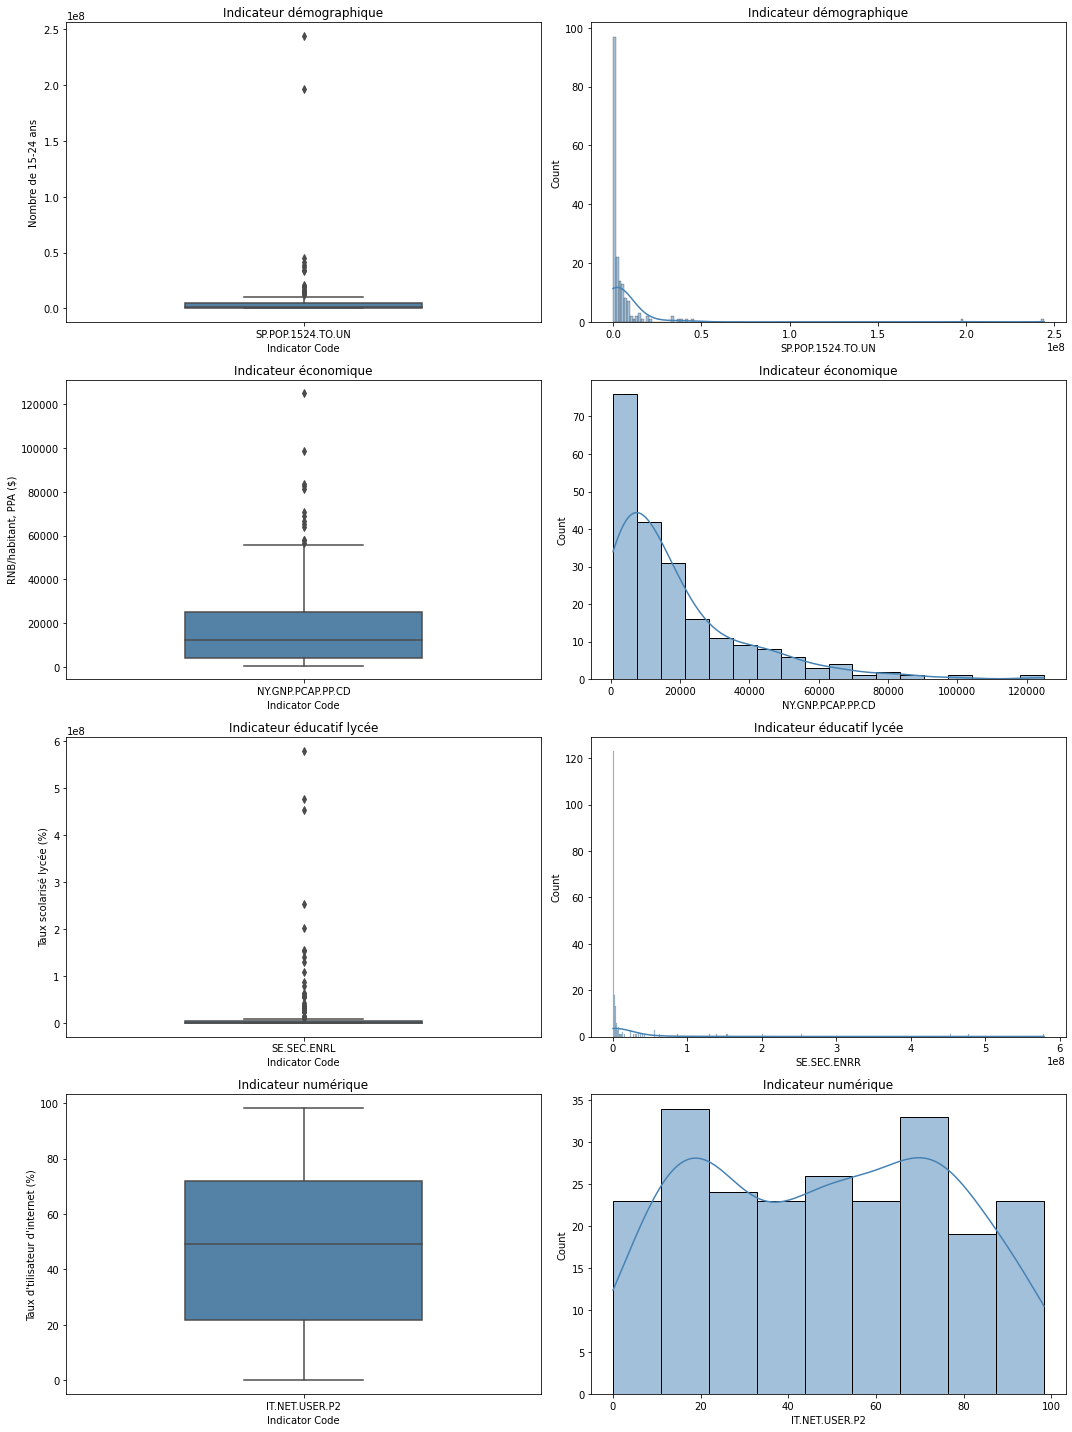

In [114]:
# Graphiques statistiques sur les 3 indicateurs
plt.figure(figsize=(15, 20))

# ------------------------------------------------------------------------------------
# Indicateur démographique : SP.POP.1524.TO.UN
# ------------------------------------------------------------------------------------
df_pop = df_pays_1an[df_pays_1an['Indicator Code'] == 'SP.POP.1524.TO.UN']

plt.subplot(4, 2, 1)
sns.boxplot(x=df_pop['Indicator Code'],
            y=df_pop['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur démographique')
plt.ylabel('Nombre de 15-24 ans')

plt.subplot(4, 2, 2)
sns.histplot(df_pop['Last info'], kde=True, color='SteelBlue')
plt.title('Indicateur démographique')
plt.xlabel('SP.POP.1524.TO.UN')

# ------------------------------------------------------------------------------------
# Indicateur économique : NY.GNP.PCAP.PP.CD
# ------------------------------------------------------------------------------------
df_eco = df_pays_1an[df_pays_1an['Indicator Code'] == 'NY.GNP.PCAP.PP.CD']

plt.subplot(4, 2, 3)
sns.boxplot(x=df_eco['Indicator Code'],
            y=df_eco['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur économique')
plt.ylabel('RNB/habitant, PPA ($)')

plt.subplot(4, 2, 4)
sns.histplot(df_eco['Last info'], kde=True, color='SteelBlue')
plt.title('Indicateur économique')
plt.xlabel('NY.GNP.PCAP.PP.CD')

# ------------------------------------------------------------------------------------
# Indicateur éducatif lycée : SE.SEC.ENRL
# ------------------------------------------------------------------------------------
df_edu_sec = df_pays_1an[df_pays_1an['Indicator Code'] == 'SE.SEC.ENRL']

plt.subplot(4, 2, 5)
sns.boxplot(x=df_edu_sec['Indicator Code'],
            y=df_edu_sec['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.ylabel('Taux scolarisé lycée (%)')

plt.subplot(4, 2, 6)
sns.histplot(df_edu_sec['Last info'], kde=True, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.xlabel('SE.SEC.ENRR')

# ------------------------------------------------------------------------------------
# Indicateur numérique : IT.NET.USER.P2
# ------------------------------------------------------------------------------------
df_num = df_pays_1an[df_pays_1an['Indicator Code'] == 'IT.NET.USER.P2']

plt.subplot(4, 2, 7)
sns.boxplot(x=df_num['Indicator Code'],
            y=df_num['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur numérique')
plt.ylabel('Taux d\'tilisateur d\'internet (%)')

plt.subplot(4, 2, 8)
sns.histplot(df_num['Last info'], kde=True, color='SteelBlue')
plt.title('Indicateur numérique')
plt.xlabel('IT.NET.USER.P2')

plt.tight_layout()

In [115]:
#non pas valeurs aberrantes, plutot valeurs extremes
#Chine, tranche 15-24 est basse car ils ont limité le nombre d'enfants par famille

In [116]:
# Statistiques descriptives
mean_num = df_num['Last info'].mean()
mean_eco = df_eco['Last info'].mean()
mean_edu_sec = df_edu_sec['Last info'].mean()
mean_pop = df_pop['Last info'].mean()

median_num = df_num['Last info'].median()
median_eco = df_eco['Last info'].median()
median_edu_sec = df_edu_sec['Last info'].median()
median_pop = df_pop['Last info'].median()

var_num = df_num['Last info'].var(ddof=0)
var_eco = df_eco['Last info'].var(ddof=0)
var_edu_sec = df_edu_sec['Last info'].var(ddof=0)
var_pop = df_pop['Last info'].var(ddof=0)

std_num = df_num['Last info'].std(ddof=0)
std_eco = df_eco['Last info'].std(ddof=0)
std_edu_sec = df_edu_sec['Last info'].std(ddof=0)
std_pop = df_pop['Last info'].std(ddof=0)

skew_num = df_num['Last info'].skew()
skew_eco = df_eco['Last info'].skew()
skew_edu_sec = df_edu_sec['Last info'].skew()
skew_pop = df_pop['Last info'].skew()

kurtosis_num = df_num['Last info'].kurtosis()
kurtosis_eco = df_eco['Last info'].kurtosis()
kurtosis_edu_sec = df_edu_sec['Last info'].kurtosis()
kurtosis_pop = df_pop['Last info'].kurtosis()

data_stats = [['mean', mean_num, mean_eco, mean_edu_sec, mean_pop],
              ['median', median_num, median_eco,
                  median_edu_sec,median_pop],
              ['var', var_num, var_eco, var_edu_sec, var_pop],
              ['std', std_num, std_eco, std_edu_sec, std_pop],
              ['skew', skew_num, skew_eco, skew_edu_sec, skew_pop],
              ['kurtosis', kurtosis_num, kurtosis_eco, kurtosis_edu_sec, kurtosis_pop]]
df_stat = pd.DataFrame(data_stats, columns=[
                       'Desc', 'Stat_num', 'Stat_eco', 'Stat_edu_sec', 'Stat_pop'])
df_stat

,Desc,Stat_num,Stat_eco,Stat_edu_sec,Stat_pop
0,mean,48.128199,1.879133e+04,1.808381e+07,6.654995e+06
1,median,49.270217,1.214100e+04,7.033866e+05,1.331040e+06
2,var,775.827150,4.019331e+08,4.545383e+15,5.747497e+14
3,std,27.853674,2.004827e+04,6.741945e+07,2.397394e+07
4,skew,0.021039,1.987373e+00,6.072055e+00,8.280323e+00
5,kurtosis,-1.227450,5.006791e+00,4.105285e+01,7.433755e+01


# Scoring

**Imputation des valeurs manquantes**

In [117]:
# Interpolation des valeurs par régression linéaire
df_interpolna = df_pays.copy()
cols_to_interpolate = df_interpolna.columns[4:-2].tolist()
#  Variables quantitatives
df_numeric = df_interpolna[cols_to_interpolate]
# Variables qualitatives
df_categ = df_interpolna.loc[:, ['Country Name', 'Country Code',
                                 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
df_numeric.interpolate(method='linear', axis=1, inplace=True)
df_pays_all = pd.concat([df_categ, df_numeric], axis=1)
nb_pays = df_pays_all['Country Name'].nunique()
print(f'nombre de pays : {nb_pays}')

nombre de pays : 241


<ipython-input-117-c8aed5c25d40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.interpolate(method='linear', axis=1, inplace=True)


**Constitution du dataframe pour établir un score**

In [118]:
# 4 indicateurs
df_score = df_pays_all.pivot_table(
    index=['Country Name'], columns="Indicator Code")['2015']
df_score.shape

(236, 4)

**Indicateurs manquants par pays**

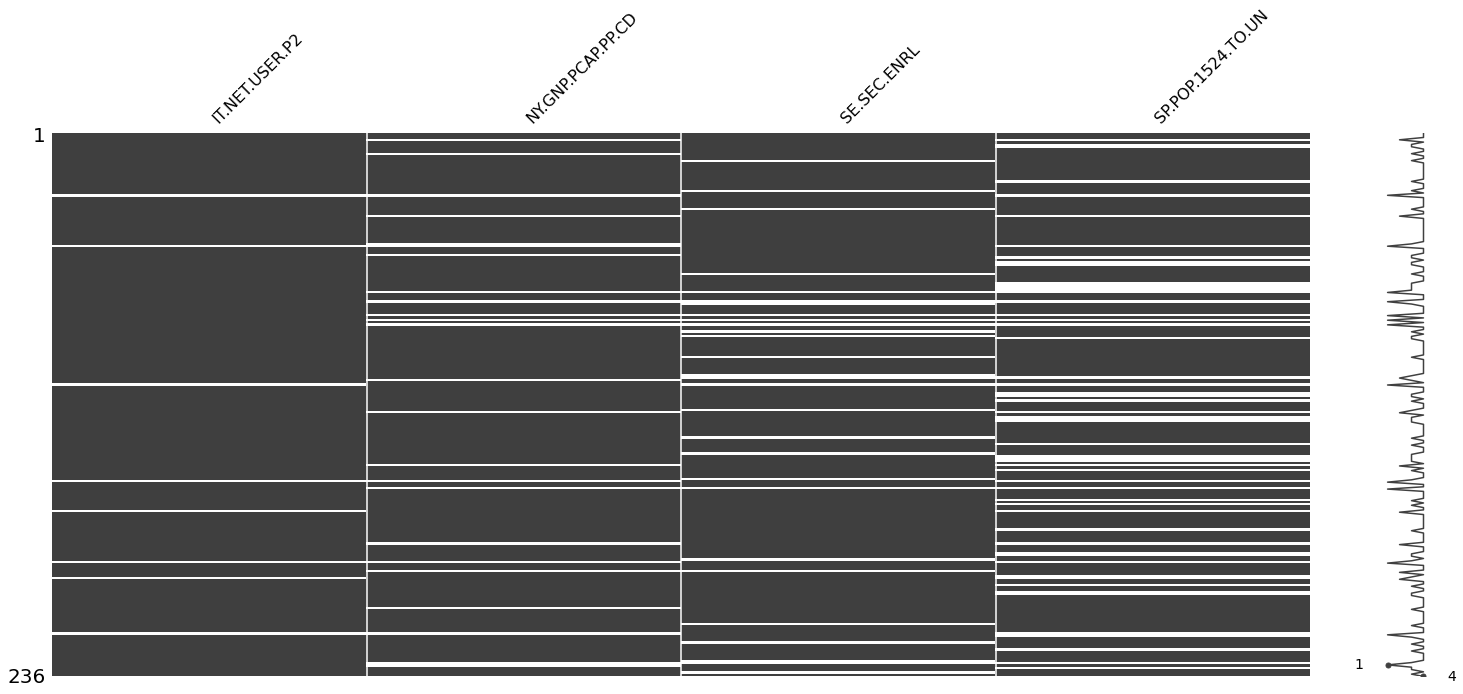

In [119]:
msno.matrix(df_score)

In [120]:
missing_values(df_score)

Le nombre des valeurs manquantes représente 12.18 % de la totalité des données: (115 NaN pour 944 observations)


In [121]:
# Liste des pays avec au moins un indicateur manquant
s_pays_indic_manquant = df_score.notnull().sum(axis=1)
i_pays_indic_manquant = s_pays_indic_manquant[s_pays_indic_manquant < 4].index
print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
df_pays_retires = df_score.loc[i_pays_indic_manquant, :].sort_values(
    by='SP.POP.1524.TO.UN', ascending=False)
df_pays_retires

Nombre de pays à retirer : 80


Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRL,SP.POP.1524.TO.UN
Country Name,,,,
Vietnam,43.500000,5740.000000,NaN,16939813.0
Kenya,21.000000,2990.000000,NaN,8902971.0
Iraq,17.220000,15810.000000,NaN,7340940.0
Syrian Arab Republic,29.979797,NaN,1857140.0,4400418.0
"Korea, Dem. People’s Rep.",0.000000,NaN,2148364.0,4023348.0
...,...,...,...,...
Turks and Caicos Islands,NaN,NaN,2013.0,NaN
Tuvalu,42.700000,6040.000000,1289.0,NaN
Upper middle income,52.568863,15883.862546,201117296.0,NaN


In [122]:
# On ne conserve que les pays avec les 4 indicateurs renseignés
df_score.dropna(thresh=4, inplace=True)
print(f'Nombre de pays restant : {df_score.shape[0]}')

Nombre de pays restant : 156


**Mise à l'échelle des données**

In [123]:
cols = ['IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD',
        'SE.SEC.ENRL', 'SP.POP.1524.TO.UN']

**StandardScaler**

In [124]:
import matplotlib.patches as mpatches

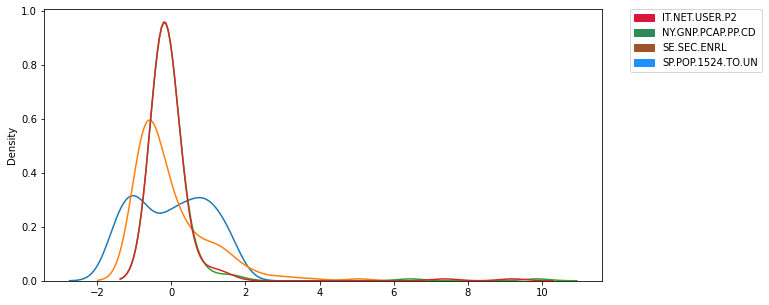

In [125]:
scaler_std = StandardScaler()
scaled_df_std = scaler_std.fit_transform(df_score[cols])
scaled_df_std = pd.DataFrame(scaled_df_std, columns=cols)
plot_graph(scaled_df_std)

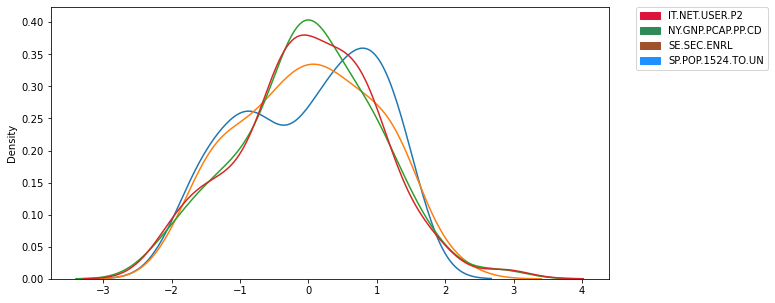

In [126]:
# Une transformation de Box Cox est une transformation d'une variable dépendante non normale en
# une forme normale.

scaler_pow = PowerTransformer(method = 'box-cox')
df_score_scaled= scaler_pow.fit_transform(df_score[cols])
df_score_scaled = pd.DataFrame(df_score_scaled, columns=cols)
plot_graph(df_score_scaled)

**Pondération/Score d'attractivité**

**Score d'attractivité**

In [127]:
# Calcul du score pour chaque pays en fonction des pondérations de chaque indicateur
#  num, eco, ed_sec, ed_ter et pop
df_score_scaled['Country Name'] = df_score.index
df_score_scaled['Score'] = [(row[0] * 0.3 + row[1] * 0.2 + row[2] * 0.3 + row[3] * 0.2) for row in zip(df_score_scaled['IT.NET.USER.P2'],
                                                                                                          df_score_scaled['NY.GNP.PCAP.PP.CD'], 
                                                                                                          df_score_scaled['SE.SEC.ENRL'],  
                                                                                                          df_score_scaled['SP.POP.1524.TO.UN'])]
df_score_scaled.sort_values(by='Score', ascending=False).head(10)

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRL,SP.POP.1524.TO.UN,Country Name,Score
149,0.934494,1.502374,1.965428,1.918254,United States,1.554102
30,0.200234,0.214242,2.677601,2.790205,China,1.464240
71,1.387774,1.192151,1.292518,1.166586,Japan,1.275835
53,1.294988,1.338154,1.283673,0.977387,Germany,1.236707
148,1.412776,1.168103,1.238629,0.912541,United Kingdom,1.211550
64,-0.672641,-0.492246,2.908280,2.919547,India,1.156152
50,1.216577,1.182273,1.184642,0.900599,France,1.136940
19,0.454319,0.265715,1.948382,1.746925,Brazil,1.123338
117,0.901876,0.627123,1.437279,1.272505,Russian Federation,1.081672
74,1.350215,0.999632,0.875633,0.812139,"Korea, Rep.",1.030108


**Score d'attractivité par région**

In [128]:
# Ajout de la région et du groupe de revenus
region_income = pd.DataFrame({'Country_Name': df_pays['Country Name'],
                              'Region': df_pays['Region'],
                              'Income Group': df_pays['Income Group']})
df_score_scaled_region = pd.merge(
    df_score_scaled, region_income, left_on='Country Name', right_on='Country_Name', how='inner')
df_score_scaled_region.drop(columns=['Country_Name'], inplace=True)
df_score_scaled_region.drop_duplicates(inplace=True)
df_score_scaled_region.sort_values(by='Score', ascending=False).head(10)

# Constitution du dataframe de visualisation du regroupement par pays
df_score_region = df_score_scaled_region.groupby('Region').mean()
df_score_region = df_score_region.rename(columns={'IT.NET.USER.P2': 'num',
                                                  'NY.GNP.PCAP.PP.CD': 'eco',
                                                  'SE.SEC.ENRL': 'edu_sec',
                                                  'SP.POP.1524.TO.UN': 'pop'})
df_score_region = df_score_region.sort_values(by='Score', ascending=False)

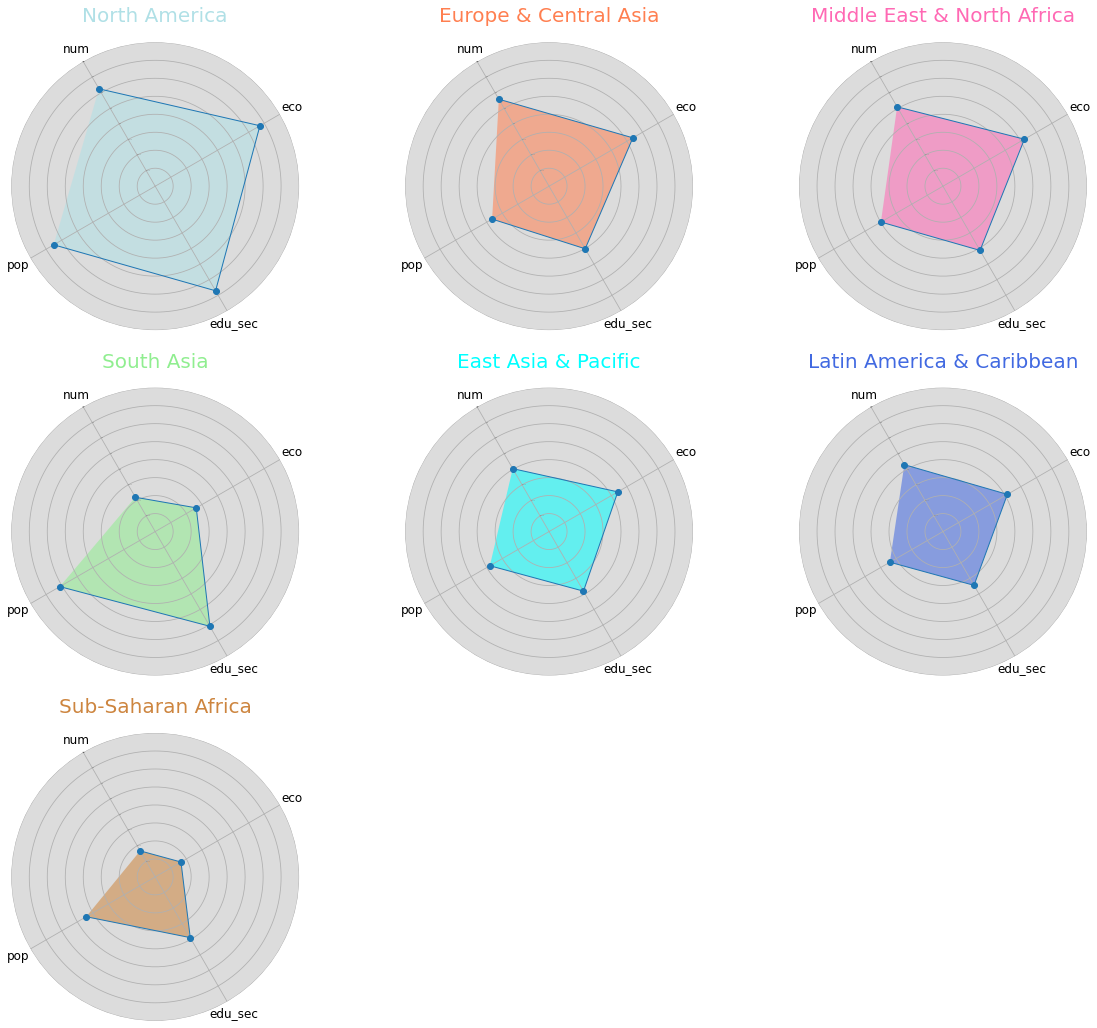

In [129]:
df_plot = df_score_region[['num', 'eco', 'edu_sec', 'pop']]
plt.rc('axes', facecolor='Gainsboro')

# number of variable
categories = list(df_plot.columns)

N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]


fig = plt.figure(1, figsize=(20, 18))

colors = ['PowderBlue', 'Coral', 'HotPink',
        'LightGreen', 'Cyan', 'RoyalBlue', 'Peru']

for i, region in enumerate(df_plot.index):

    ax = fig.add_subplot(3, 3, i+1, polar=True)

    ax.set_theta_offset(2*np.pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=8)
    plt.yticks(color="grey", size=2)
    values = df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2, 2)

plt.show()

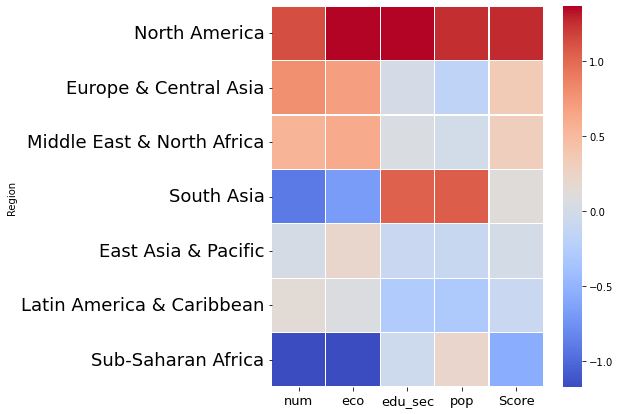

In [130]:
fig = plt.figure(1, figsize=(7, 7))
res = sns.heatmap(df_score_region, square=True,
                  linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=18)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=13)
plt.show()

**Score d'attractivité par groupe de revenus**

In [131]:
df_score_income = df_score_scaled_region.groupby('Income Group').mean()
df_score_income = df_score_income.rename(columns={'IT.NET.USER.P2': 'num',
                                                  'NY.GNP.PCAP.PP.CD': 'eco',
                                                  'SE.SEC.ENRL': 'edu_sec',
                                                  'SP.POP.1524.TO.UN': 'pop'})

df_score_income = df_score_income.sort_values(by='Score', ascending=False)

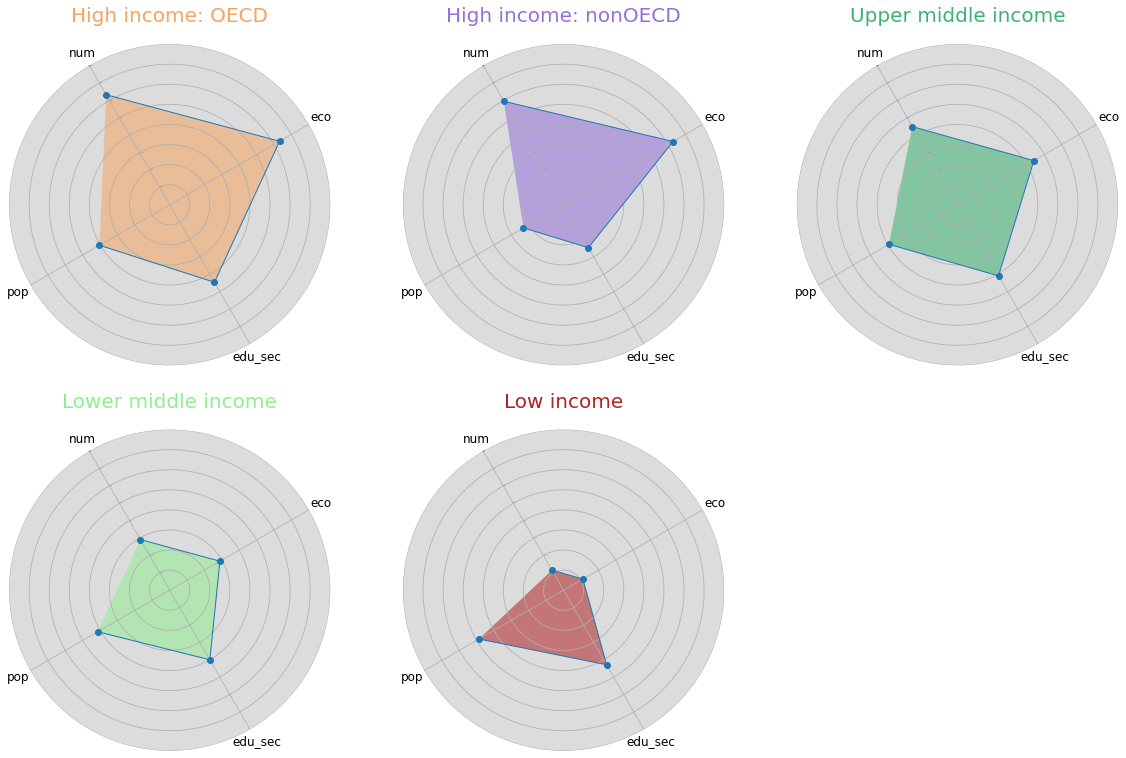

In [132]:
df_plot = df_score_income[['num', 'eco', 'edu_sec', 'pop']]

plt.rc('axes', facecolor='Gainsboro')

# number of variable
categories = list(df_plot.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]


fig = plt.figure(1, figsize=(20, 13))

colors = ['SandyBrown', 'MediumPurple',
          'MediumSeaGreen', 'LightGreen', 'FireBrick']

for i, region in enumerate(df_plot.index):

    ax = fig.add_subplot(2, 3, i+1, polar=True)

    ax.set_theta_offset(2*np.pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=16)
    plt.yticks(color="grey", size=2)
    values = df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2, 2)

plt.show()

In [133]:
#graphes faciles à lire visuellement
#15 min présentation : 10 slides, 1, 1min30 min par slide
#ingénieure en Télécommunications
#présentation problématique
#nettoyage, exploitation des bases de données, utiliser les dataframes, conversion dataframes, fonctions, librairies, des graphes, les distributions,
#prendre du temps pour les indicateurs, remplissage valeurs manquantes indicateurs
#j'ai appris comment faire les fonctions, les histogrammes, python
#10 min présentation, 5 min notebook

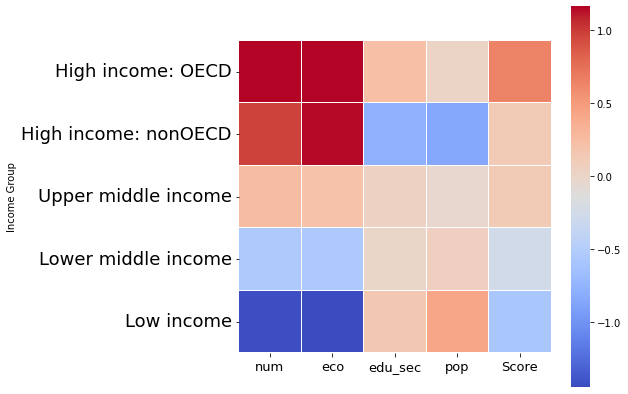

In [134]:
fig = plt.figure(1, figsize=(7, 7))
ax = sns.heatmap(df_score_income, square=True, linewidths=0.1, cmap='coolwarm')
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=18)
plt.show()

**Bilan : Top 10 des pays attractifs**

In [138]:
df_top10_prov = df_score_scaled[['Country Name', 'Score']].sort_values(
    by='Score', ascending=False).head(10)
df_top10_prov['Ranking'] = np.arange(1, 11, 1)
df_top10_prov.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10_prov.set_index('Ranking')

,Pays,Score
Ranking,,
1,United States,1.554102
2,China,1.464240
3,Japan,1.275835
4,Germany,1.236707
5,United Kingdom,1.211550
6,India,1.156152
7,France,1.136940
8,Brazil,1.123338
9,Russian Federation,1.081672
